# Homegrown vs Foreign
### Are homegrown players generally the best in their respective leagues or are they inferior to the foreign players playing in that league? Are these findings portrayed in the FIFA 18’s ratings. 

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 

In [2]:
RQ2 = pd.read_csv(('../../data/analysis/RQ2.csv'))
RQ2 = RQ2.drop('Unnamed: 0', 1)
RQ2 = RQ2.iloc[1:]

In [3]:
RQ2

,Players,Position,Clubs,league,age,nationality,overall,Continent,Homegrown,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
1,Lionel Messi,Forward,BARC,Spanish Primera Division,30.0,Argentina,93.0,South America,False,0.934524,0.059524,168.0,8.255952,1.065476,0.386905,0.000000
2,Cristiano Ronaldo,Forward,MADR,Spanish Primera Division,32.0,Portugal,94.0,Europe,False,0.975610,0.109756,164.0,7.926829,1.054878,0.317073,0.000000
3,Zlatan Ibrahimovic,Forward,PSG,English Premier League,35.0,Sweden,88.0,Europe,False,0.959016,0.114754,122.0,7.286885,0.926230,0.311475,0.000000
4,Luis Suarez,Forward,BARC,Spanish Primera Division,30.0,Uruguay,92.0,South America,False,0.959596,0.202020,99.0,7.252525,0.848485,0.424242,0.000000
5,Denis Bouanga,Midfielder,LORI,French Ligue 2,22.0,Gabon,71.0,Africa,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.000000
6,Luca Crosta,Goalkeeper,NaN,Italian Serie A,19.0,Italy,64.0,Europe,True,1.000000,0.000000,1.0,7.000000,0.000000,0.000000,0.000000
7,Dylan Saint-Louis,Midfielder,ASSE,French Ligue 2,22.0,France,68.0,Europe,False,1.000000,1.000000,1.0,7.000000,1.000000,0.000000,0.000000
8,Josh Harrop,Midfielder,MUFC,English Championship,21.0,England,65.0,Europe,False,1.000000,0.000000,1.0,7.000000,1.000000,0.000000,0.000000
9,Luis Suarez,Forward,LPOOL,Spanish Primera Division,30.0,Uruguay,92.0,South America,False,1.000000,0.075758,66.0,6.666667,0.818182,0.272727,0.000000
10,Edinson Cavani,Forward,NAPO,French Ligue 1,30.0,Uruguay,87.0,South America,False,0.970588,0.029412,34.0,6.352941,0.852941,0.117647,0.000000


### Part 1: Who Preforms Better vs Who Is Better Rated 

In [4]:
best_preforming = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_preforming = best_preforming.groupby(['nationality']).mean()[['Average Form']].sort_values('Average Form', ascending=False)
best_preforming

,Average Form
nationality,
France,2.211816
Germany,2.115644
Spain,2.066008
England,2.036970
Italy,1.994722


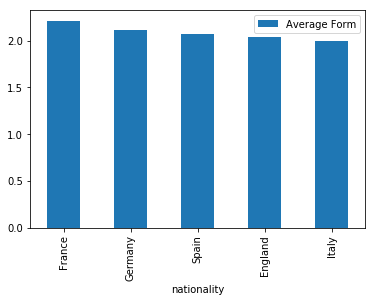

In [5]:
best_preforming.plot.bar()

In [6]:
best_rated = RQ2.loc[RQ2['nationality'].isin(['Germany','England','Italy','Spain','France'])]
best_rated = best_rated.groupby(['nationality']).mean()[['overall']].sort_values('overall', ascending=False)
best_rated

,overall
nationality,
Spain,74.668845
Germany,73.321962
France,73.003058
Italy,72.768519
England,72.111979


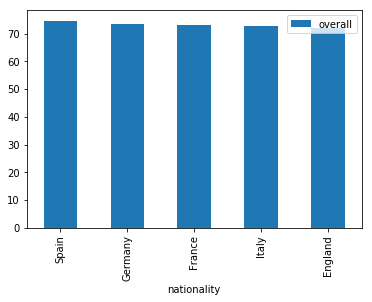

In [7]:
best_rated.plot.bar()

### Lets look at the Domestic Leagues

In [8]:
EPL = RQ2.loc[RQ2.league=='English Premier League']
BUN = RQ2.loc[RQ2.league=='German Bundesliga']
LAL = RQ2.loc[RQ2.league=='Spanish Primera Division']
L1 = RQ2.loc[RQ2.league=='French Ligue 1']
SEI = RQ2.loc[RQ2.league=='Italian Serie A']

In [9]:
Homegrown_EPL = EPL.loc[EPL.Homegrown==True]
Foreign_EPL = EPL.loc[EPL.Homegrown==False]

Homegrown_BUN = BUN.loc[BUN.Homegrown==True]
Foreign_BUN = BUN.loc[BUN.Homegrown==False]

Homegrown_LAL = LAL.loc[LAL.Homegrown==True]
Foreign_LAL = LAL.loc[LAL.Homegrown==False]

Homegrown_L1 = L1.loc[L1.Homegrown==True]
Foreign_L1 = L1.loc[L1.Homegrown==False]

Homegrown_SEI = SEI.loc[SEI.Homegrown==True]
Foreign_SEI = SEI.loc[SEI.Homegrown==False]

### Player Count (What proportion of players are homegrown in each league)

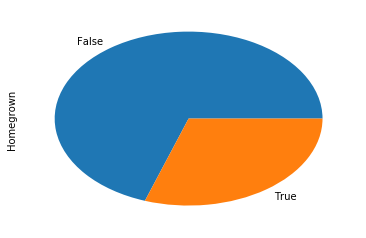

In [10]:
EPL.Homegrown.value_counts(sort=False).plot.pie()

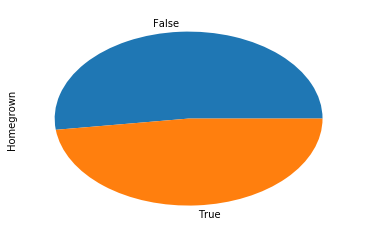

In [11]:
LAL.Homegrown.value_counts(sort=False).plot.pie()

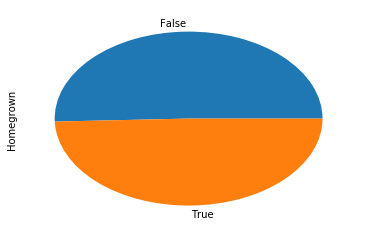

In [12]:
BUN.Homegrown.value_counts(sort=False).plot.pie()

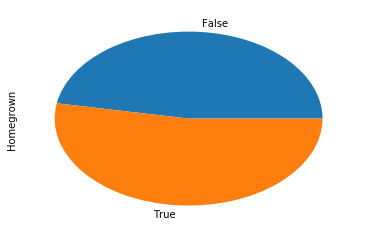

In [13]:
L1.Homegrown.value_counts(sort=False).plot.pie()

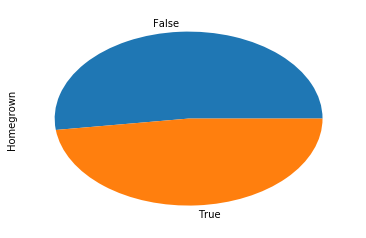

In [14]:
SEI.Homegrown.value_counts(sort=False).plot.pie()

### % of Homegrown Players Playing Abroad

In [15]:
ENG_abroad = RQ2.loc[(RQ2.nationality=='England') & (RQ2.league!='English Premier League')]
GER_abroad = RQ2.loc[(RQ2.nationality=='Germany') & (RQ2.league!='German Bundesliga')]
SPA_abroad = RQ2.loc[(RQ2.nationality=='Spain') & (RQ2.league!='Spanish Primera Division')]
FR_abroad = RQ2.loc[(RQ2.nationality=='France') & (RQ2.league!='French Ligue 1')]
ITA_abroad = RQ2.loc[(RQ2.nationality=='Italy') & (RQ2.league!='Italian Serie A')]

In [16]:
ENG_abroad

,Players,Position,Clubs,league,age,nationality,overall,Continent,Homegrown,Starts/Apps,Subbed Off/Apps,Overall Apps,Average Form,Goals/Apps,Assists/Apps,Clean Sheets/Apps
8,Josh Harrop,Midfielder,MUFC,English Championship,21.0,England,65.0,Europe,False,1.000000,0.000000,1.0,7.000000,1.000000,0.000000,0.000000
47,Ashley Cole,Defender,ROMA,USA Major League Soccer,36.0,England,71.0,Europe,False,1.000000,0.000000,11.0,5.090909,0.000000,0.000000,0.818182
256,Ashley Cole,Defender,CHEL,USA Major League Soccer,36.0,England,71.0,Europe,False,0.958333,0.041667,48.0,3.750000,0.020833,0.083333,0.437500
357,John Terry,Defender,CHEL,English Championship,36.0,England,77.0,Europe,False,0.949580,0.050420,119.0,3.521008,0.109244,0.008403,0.369748
468,Micah Richards,Defender,MCFC,English Championship,29.0,England,73.0,Europe,False,1.000000,0.333333,9.0,3.333333,0.000000,0.000000,0.333333
496,Andre Wisdom,Defender,LPOOL,English Championship,24.0,England,71.0,Europe,False,0.928571,0.214286,14.0,3.285714,0.000000,0.071429,0.357143
557,Cameron Borthwick-Jackson,Defender,MUFC,English Championship,20.0,England,69.0,Europe,False,0.600000,0.100000,10.0,3.200000,0.000000,0.200000,0.100000
647,Carl Jenkinson,Defender,ARSL,English Championship,25.0,England,73.0,Europe,False,0.758621,0.103448,29.0,3.103448,0.034483,0.068966,0.310345
663,Adam Le Fondre,Forward,RFC,English Championship,30.0,England,68.0,Europe,False,0.323529,0.029412,34.0,3.088235,0.352941,0.029412,0.000000
750,Reece Burke,Defender,WESTHAM,English Championship,20.0,England,65.0,Europe,False,0.800000,0.200000,5.0,3.000000,0.000000,0.000000,0.400000


### Breakdown of Positions

In [17]:
EPL_H_GK = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Average Form'].mean()
EPL_F_GK = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Average Form'].mean()

EPL_H_DEF = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Defender','Average Form'].mean()
EPL_F_DEF = Foreign_EPL.loc[Foreign_EPL['Position']=='Defender','Average Form'].mean()

EPL_H_MID = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Midfielder','Average Form'].mean()
EPL_F_MID = Foreign_EPL.loc[Foreign_EPL['Position']=='Midfielder','Average Form'].mean()

EPL_H_FWD = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Average Form'].mean()
EPL_F_FWD = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Average Form'].mean()

EPL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
EPL_positions.set_value(0,'Position',"Goalkeeper")
EPL_positions.set_value(0,'Homegrown',EPL_H_GK)
EPL_positions.set_value(0,'Foreign',EPL_F_GK)
EPL_positions.set_value(1,'Position',"Defender")
EPL_positions.set_value(1,'Homegrown',EPL_H_DEF)
EPL_positions.set_value(1,'Foreign',EPL_F_DEF)
EPL_positions.set_value(2,'Position',"Midfielder")
EPL_positions.set_value(2,'Homegrown',EPL_H_MID)
EPL_positions.set_value(2,'Foreign',EPL_F_MID)
EPL_positions.set_value(3,'Position',"Forward")
EPL_positions.set_value(3,'Homegrown',EPL_H_FWD)
EPL_positions.set_value(3,'Foreign',EPL_F_FWD)

,Position,Homegrown,Foreign
0,Goalkeeper,2.19799,2.56567
1,Defender,2.25365,2.42681
2,Midfielder,2.08885,2.42534
3,Forward,2.95531,3.12335


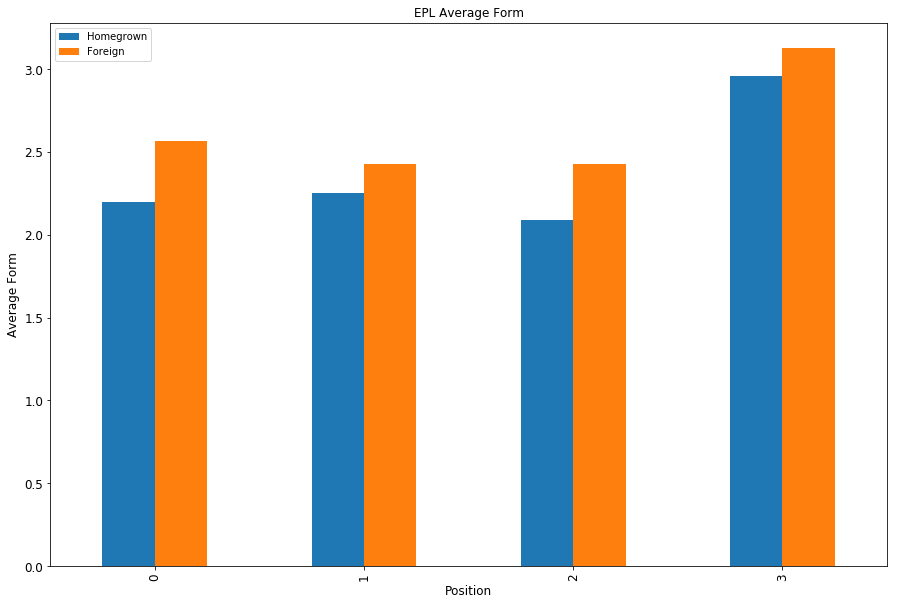

In [18]:
ax = EPL_positions[['Homegrown','Foreign']].plot(kind='bar', title ="EPL Average Form", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

In [19]:
LAL_H_GK = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Average Form'].mean()
LAL_F_GK = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Average Form'].mean()

LAL_H_DEF = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Defender','Average Form'].mean()
LAL_F_DEF = Foreign_LAL.loc[Foreign_LAL['Position']=='Defender','Average Form'].mean()

LAL_H_MID = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Midfielder','Average Form'].mean()
LAL_F_MID = Foreign_LAL.loc[Foreign_LAL['Position']=='Midfielder','Average Form'].mean()

LAL_H_FWD = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Average Form'].mean()
LAL_F_FWD = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Average Form'].mean()

LAL_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
LAL_positions.set_value(0,'Position',"Goalkeeper")
LAL_positions.set_value(0,'Homegrown',LAL_H_GK)
LAL_positions.set_value(0,'Foreign',LAL_F_GK)
LAL_positions.set_value(1,'Position',"Defender")
LAL_positions.set_value(1,'Homegrown',LAL_H_DEF)
LAL_positions.set_value(1,'Foreign',LAL_F_DEF)
LAL_positions.set_value(2,'Position',"Midfielder")
LAL_positions.set_value(2,'Homegrown',LAL_H_MID)
LAL_positions.set_value(2,'Foreign',LAL_F_MID)
LAL_positions.set_value(3,'Position',"Forward")
LAL_positions.set_value(3,'Homegrown',LAL_H_FWD)
LAL_positions.set_value(3,'Foreign',LAL_F_FWD)

,Position,Homegrown,Foreign
0,Goalkeeper,2.19394,2.43006
1,Defender,2.0149,2.48368
2,Midfielder,2.01291,2.28455
3,Forward,2.36949,3.07465


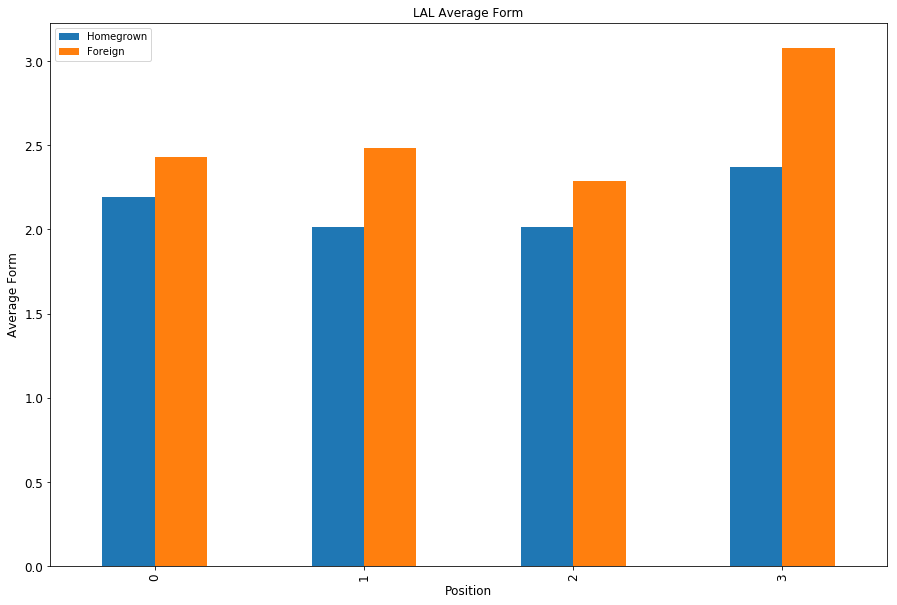

In [20]:
ax = LAL_positions[['Homegrown','Foreign']].plot(kind='bar', title ="LAL Average Form", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

In [21]:
BUN_H_GK = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Average Form'].mean()
BUN_F_GK = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Average Form'].mean()

BUN_H_DEF = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Defender','Average Form'].mean()
BUN_F_DEF = Foreign_BUN.loc[Foreign_BUN['Position']=='Defender','Average Form'].mean()

BUN_H_MID = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Midfielder','Average Form'].mean()
BUN_F_MID = Foreign_BUN.loc[Foreign_BUN['Position']=='Midfielder','Average Form'].mean()

BUN_H_FWD = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Average Form'].mean()
BUN_F_FWD = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Average Form'].mean()

BUN_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
BUN_positions.set_value(0,'Position',"Goalkeeper")
BUN_positions.set_value(0,'Homegrown',BUN_H_GK)
BUN_positions.set_value(0,'Foreign',BUN_F_GK)
BUN_positions.set_value(1,'Position',"Defender")
BUN_positions.set_value(1,'Homegrown',BUN_H_DEF)
BUN_positions.set_value(1,'Foreign',BUN_F_DEF)
BUN_positions.set_value(2,'Position',"Midfielder")
BUN_positions.set_value(2,'Homegrown',BUN_H_MID)
BUN_positions.set_value(2,'Foreign',BUN_F_MID)
BUN_positions.set_value(3,'Position',"Forward")
BUN_positions.set_value(3,'Homegrown',BUN_H_FWD)
BUN_positions.set_value(3,'Foreign',BUN_F_FWD)

,Position,Homegrown,Foreign
0,Goalkeeper,2.44257,2.75539
1,Defender,2.18214,2.13571
2,Midfielder,2.25822,2.33039
3,Forward,2.72724,2.79586


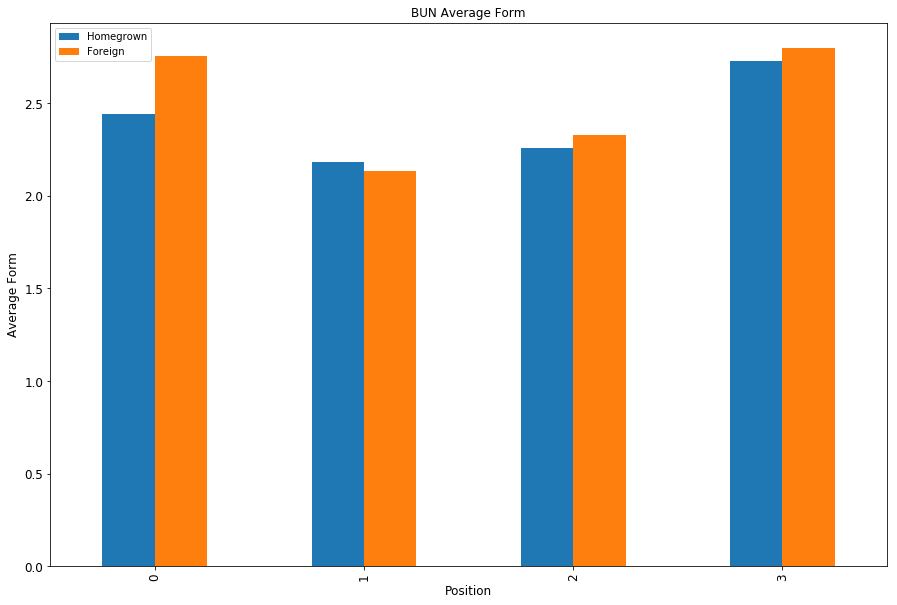

In [22]:
ax = BUN_positions[['Homegrown','Foreign']].plot(kind='bar', title ="BUN Average Form", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

In [23]:
L1_H_GK = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Average Form'].mean()
L1_F_GK = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Average Form'].mean()

L1_H_DEF = Homegrown_L1.loc[Homegrown_L1['Position']=='Defender','Average Form'].mean()
L1_F_DEF = Foreign_L1.loc[Foreign_L1['Position']=='Defender','Average Form'].mean()

L1_H_MID = Homegrown_L1.loc[Homegrown_L1['Position']=='Midfielder','Average Form'].mean()
L1_F_MID = Foreign_L1.loc[Foreign_L1['Position']=='Midfielder','Average Form'].mean()

L1_H_FWD = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Average Form'].mean()
L1_F_FWD = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Average Form'].mean()

L1_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
L1_positions.set_value(0,'Position',"Goalkeeper")
L1_positions.set_value(0,'Homegrown',L1_H_GK)
L1_positions.set_value(0,'Foreign',L1_F_GK)
L1_positions.set_value(1,'Position',"Defender")
L1_positions.set_value(1,'Homegrown',L1_H_DEF)
L1_positions.set_value(1,'Foreign',L1_F_DEF)
L1_positions.set_value(2,'Position',"Midfielder")
L1_positions.set_value(2,'Homegrown',L1_H_MID)
L1_positions.set_value(2,'Foreign',L1_F_MID)
L1_positions.set_value(3,'Position',"Forward")
L1_positions.set_value(3,'Homegrown',L1_H_FWD)
L1_positions.set_value(3,'Foreign',L1_F_FWD)

,Position,Homegrown,Foreign
0,Goalkeeper,2.40339,2.64692
1,Defender,2.47389,2.40693
2,Midfielder,2.17075,2.17721
3,Forward,2.22054,2.53029


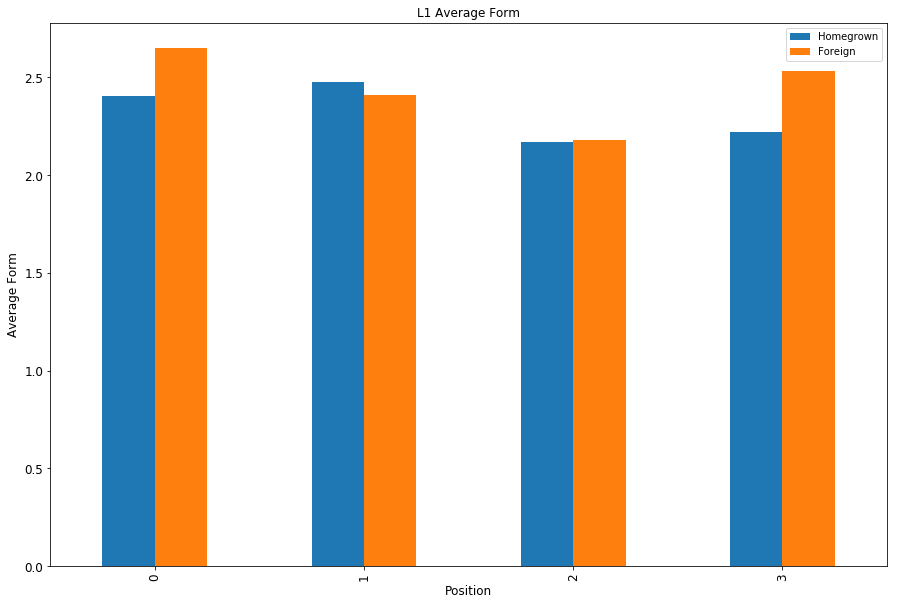

In [24]:
ax = L1_positions[['Homegrown','Foreign']].plot(kind='bar', title ="L1 Average Form", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

In [25]:
SEI_H_GK = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Average Form'].mean()
SEI_F_GK = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Average Form'].mean()

SEI_H_DEF = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Defender','Average Form'].mean()
SEI_F_DEF = Foreign_SEI.loc[Foreign_SEI['Position']=='Defender','Average Form'].mean()

SEI_H_MID = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Midfielder','Average Form'].mean()
SEI_F_MID = Foreign_SEI.loc[Foreign_SEI['Position']=='Midfielder','Average Form'].mean()

SEI_H_FWD = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Average Form'].mean()
SEI_F_FWD = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Average Form'].mean()

SEI_positions = pd.DataFrame(columns = ["Position","Homegrown", "Foreign"])
SEI_positions.set_value(0,'Position',"Goalkeeper")
SEI_positions.set_value(0,'Homegrown',SEI_H_GK)
SEI_positions.set_value(0,'Foreign',SEI_F_GK)
SEI_positions.set_value(1,'Position',"Defender")
SEI_positions.set_value(1,'Homegrown',SEI_H_DEF)
SEI_positions.set_value(1,'Foreign',SEI_F_DEF)
SEI_positions.set_value(2,'Position',"Midfielder")
SEI_positions.set_value(2,'Homegrown',SEI_H_MID)
SEI_positions.set_value(2,'Foreign',SEI_F_MID)
SEI_positions.set_value(3,'Position',"Forward")
SEI_positions.set_value(3,'Homegrown',SEI_H_FWD)
SEI_positions.set_value(3,'Foreign',SEI_F_FWD)

,Position,Homegrown,Foreign
0,Goalkeeper,2.24142,2.78365
1,Defender,2.23772,2.25963
2,Midfielder,1.96121,2.26671
3,Forward,2.34646,2.73324


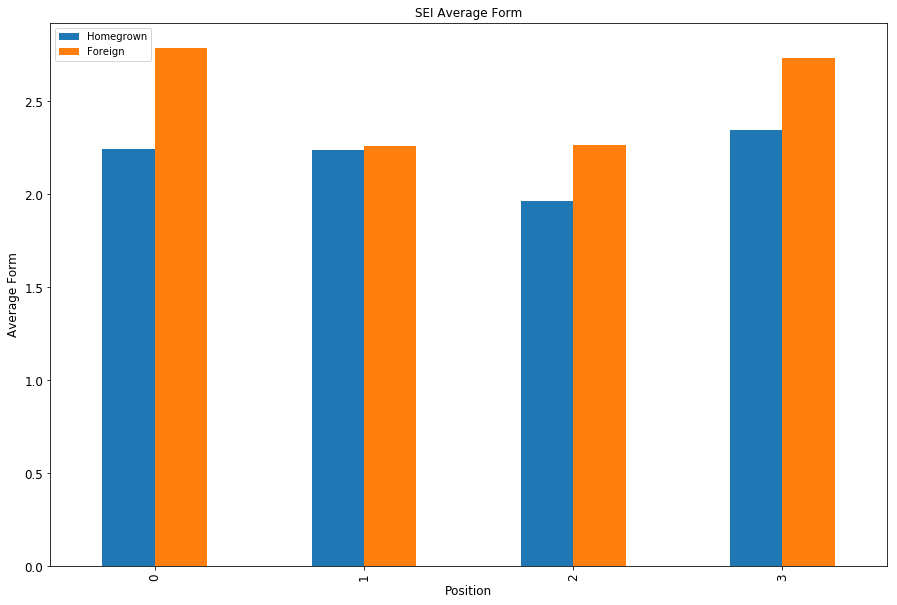

In [26]:
ax = SEI_positions[['Homegrown','Foreign']].plot(kind='bar', title ="SEI Average Form", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

### Whos more likely to Start

In [27]:
EPLH_starts = Homegrown_EPL['Starts/Apps'].mean()
EPLF_starts = Foreign_EPL['Starts/Apps'].mean()

LALH_starts = Homegrown_LAL['Starts/Apps'].mean()
LALF_starts = Foreign_LAL['Starts/Apps'].mean()

BUNH_starts = Homegrown_BUN['Starts/Apps'].mean()
BUNF_starts = Foreign_BUN['Starts/Apps'].mean()

L1H_starts = Homegrown_L1['Starts/Apps'].mean()
L1F_starts = Foreign_L1['Starts/Apps'].mean()

SEIH_starts = Homegrown_SEI['Starts/Apps'].mean()
SEIF_starts = Foreign_SEI['Starts/Apps'].mean()

starts = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
starts.set_value(0,'League',"EPL")
starts.set_value(0,'Homegrown',EPLH_starts)
starts.set_value(0,'Foreign',EPLF_starts)
starts.set_value(1,'League',"LAL")
starts.set_value(1,'Homegrown',LALH_starts )
starts.set_value(1,'Foreign',LALF_starts)
starts.set_value(2,'League',"BUN")
starts.set_value(2,'Homegrown',BUNH_starts)
starts.set_value(2,'Foreign',BUNF_starts)
starts.set_value(3,'League',"L1")
starts.set_value(3,'Homegrown',L1H_starts)
starts.set_value(3,'Foreign',L1F_starts)
starts.set_value(4,'League',"SEI")
starts.set_value(4,'Homegrown',SEIH_starts)
starts.set_value(4,'Foreign',SEIF_starts)

,League,Homegrown,Foreign
0,EPL,0.708178,0.791586
1,LAL,0.713727,0.752787
2,BUN,0.71112,0.729268
3,L1,0.707049,0.717593
4,SEI,0.69758,0.736732


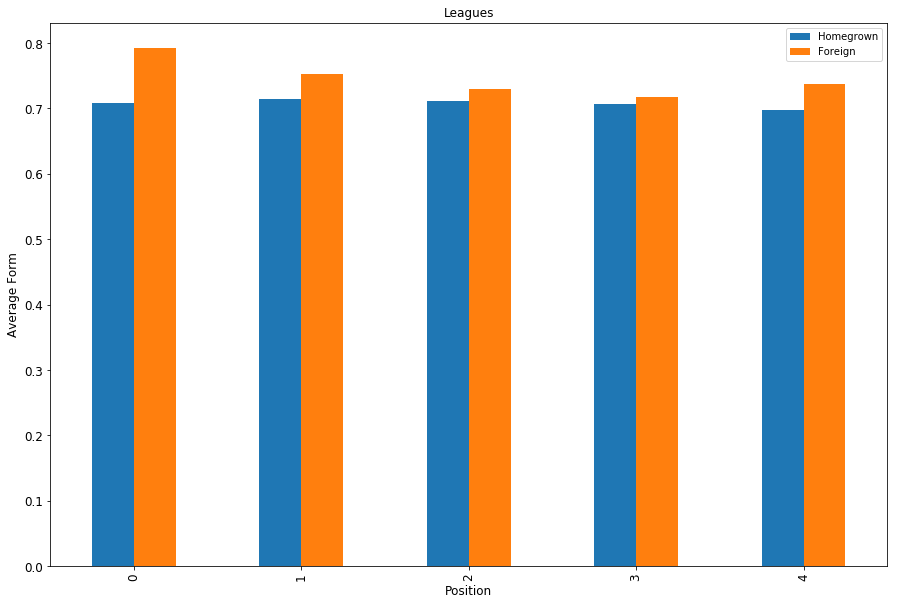

In [28]:
ax = starts[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

### Who's More Likely to be Subbed off 

In [29]:
EPLH_subbed = Homegrown_EPL['Subbed Off/Apps'].mean()
EPLF_subbed = Foreign_EPL['Subbed Off/Apps'].mean()
EPL_subbed = pd.DataFrame([EPLH_subbed,EPLF_subbed])

LALH_subbed = Homegrown_LAL['Subbed Off/Apps'].mean()
LALF_subbed = Foreign_LAL['Subbed Off/Apps'].mean()
LAL_subbed = pd.DataFrame([LALH_subbed,LALF_subbed])

BUNH_subbed = Homegrown_BUN['Subbed Off/Apps'].mean()
BUNF_subbed = Foreign_BUN['Subbed Off/Apps'].mean()
BUN_subbed = pd.DataFrame([BUNH_subbed,BUNF_subbed])

L1H_subbed = Homegrown_L1['Subbed Off/Apps'].mean()
L1F_subbed = Foreign_L1['Subbed Off/Apps'].mean()
L1_subbed = pd.DataFrame([L1H_subbed,L1F_subbed])

SEIH_subbed = Homegrown_SEI['Subbed Off/Apps'].mean()
SEIF_subbed = Foreign_SEI['Subbed Off/Apps'].mean()
SEI_subbed = pd.DataFrame([SEIH_subbed,SEIF_subbed])

subbed = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
subbed.set_value(0,'League',"EPL")
subbed.set_value(0,'Homegrown',EPLH_subbed)
subbed.set_value(0,'Foreign',EPLF_subbed)
subbed.set_value(1,'League',"LAL")
subbed.set_value(1,'Homegrown',LALH_subbed )
subbed.set_value(1,'Foreign',LALF_subbed)
subbed.set_value(2,'League',"BUN")
subbed.set_value(2,'Homegrown',BUNH_subbed)
subbed.set_value(2,'Foreign',BUNF_subbed)
subbed.set_value(3,'League',"L1")
subbed.set_value(3,'Homegrown',L1H_subbed)
subbed.set_value(3,'Foreign',L1F_subbed)
subbed.set_value(4,'League',"SEI")
subbed.set_value(4,'Homegrown',SEIH_subbed)
subbed.set_value(4,'Foreign',SEIF_subbed)

,League,Homegrown,Foreign
0,EPL,0.178559,0.191746
1,LAL,0.191075,0.234759
2,BUN,0.196471,0.213514
3,L1,0.21232,0.182977
4,SEI,0.171712,0.221224


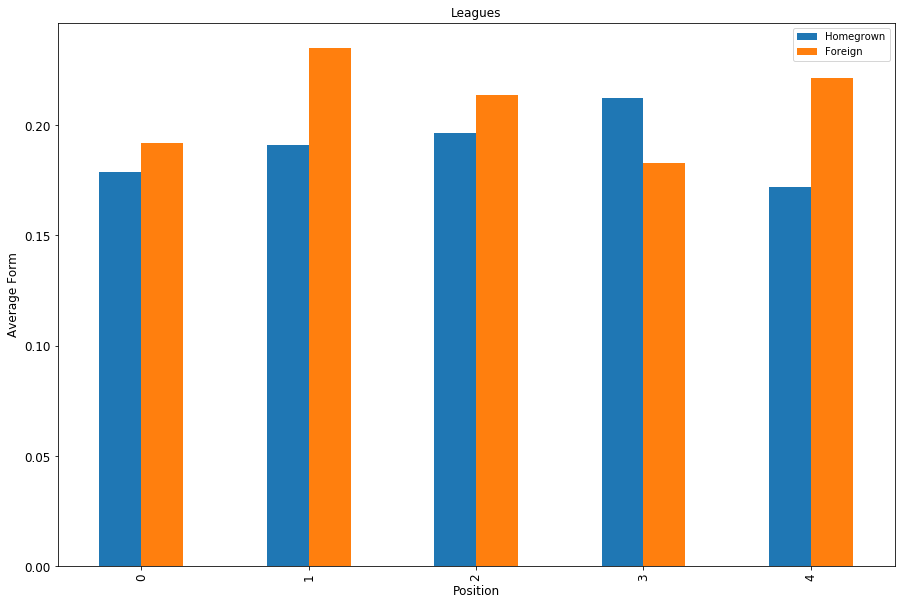

In [30]:
ax = subbed[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

### Whos more likely to score all of the goals?

In [31]:
EPLH_goals = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Forward','Goals/Apps'].mean()
EPLF_goals = Foreign_EPL.loc[Foreign_EPL['Position']=='Forward','Goals/Apps'].mean()

BUNH_goals = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Forward','Goals/Apps'].mean()
BUNF_goals = Foreign_BUN.loc[Foreign_BUN['Position']=='Forward','Goals/Apps'].mean()

LALH_goals = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Forward','Goals/Apps'].mean()
LALF_goals = Foreign_LAL.loc[Foreign_LAL['Position']=='Forward','Goals/Apps'].mean()

L1H_goals = Homegrown_L1.loc[Homegrown_L1['Position']=='Forward','Goals/Apps'].mean()
L1F_goals = Foreign_L1.loc[Foreign_L1['Position']=='Forward','Goals/Apps'].mean()

SEIH_goals = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Forward','Goals/Apps'].mean()
SEIF_goals = Foreign_SEI.loc[Foreign_SEI['Position']=='Forward','Goals/Apps'].mean()

goals = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
goals.set_value(0,'League',"EPL")
goals.set_value(0,'Homegrown',EPLH_goals)
goals.set_value(0,'Foreign',EPLF_goals)
goals.set_value(1,'League',"LAL")
goals.set_value(1,'Homegrown',LALH_goals )
goals.set_value(1,'Foreign',LALF_goals)
goals.set_value(2,'League',"BUN")
goals.set_value(2,'Homegrown',BUNH_goals)
goals.set_value(2,'Foreign',BUNF_goals)
goals.set_value(3,'League',"L1")
goals.set_value(3,'Homegrown',L1H_goals)
goals.set_value(3,'Foreign',L1F_goals)
goals.set_value(4,'League',"SEI")
goals.set_value(4,'Homegrown',SEIH_goals)
goals.set_value(4,'Foreign',SEIF_goals)

,League,Homegrown,Foreign
0,EPL,0.24973,0.26587
1,LAL,0.14989,0.253184
2,BUN,0.194698,0.21531
3,L1,0.125292,0.188185
4,SEI,0.164683,0.207685


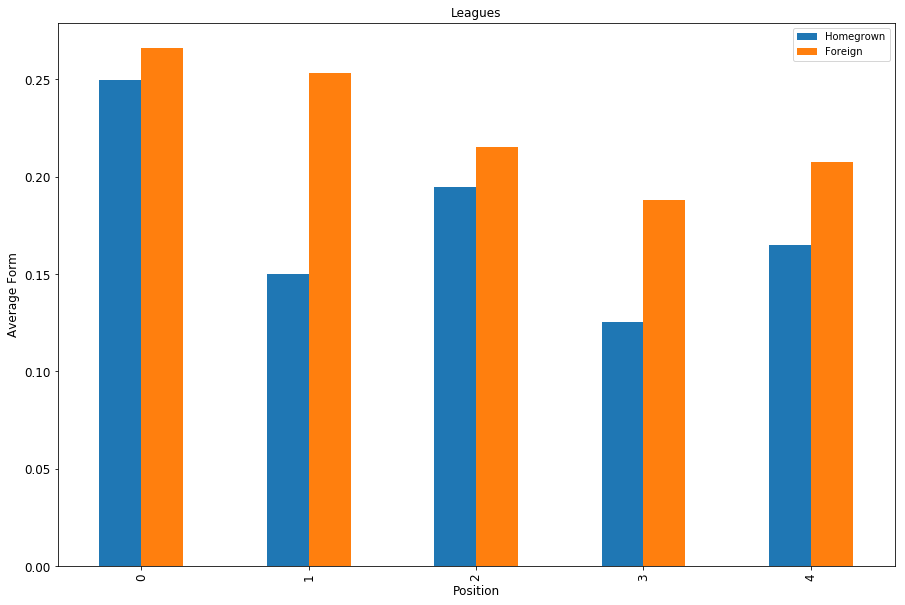

In [32]:
ax = goals[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

### Whos more likely to assist all of the goals?

In [33]:
EPLH_assists = Homegrown_EPL['Assists/Apps'].mean()
EPLF_assists = Foreign_EPL['Assists/Apps'].mean()
EPL_assists = pd.DataFrame([EPLH_assists,EPLF_assists])

LALH_assists = Homegrown_LAL['Assists/Apps'].mean()
LALF_assists = Foreign_LAL['Assists/Apps'].mean()
LAL_assists = pd.DataFrame([LALH_assists,LALF_assists])

BUNH_assists = Homegrown_BUN['Assists/Apps'].mean()
BUNF_assists = Foreign_BUN['Assists/Apps'].mean()
BUN_assists = pd.DataFrame([BUNH_assists,BUNF_assists])

L1H_assists = Homegrown_L1['Assists/Apps'].mean()
L1F_assists = Foreign_L1['Assists/Apps'].mean()
L1_assists = pd.DataFrame([L1H_assists,L1F_assists])

SEIH_assists = Homegrown_SEI['Assists/Apps'].mean()
SEIF_assists = Foreign_SEI['Assists/Apps'].mean()
SEI_assists = pd.DataFrame([SEIH_assists,SEIF_assists])

assists = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
assists.set_value(0,'League',"EPL")
assists.set_value(0,'Homegrown',EPLH_assists)
assists.set_value(0,'Foreign',EPLF_assists)
assists.set_value(1,'League',"LAL")
assists.set_value(1,'Homegrown',LALH_assists )
assists.set_value(1,'Foreign',LALF_assists)
assists.set_value(2,'League',"BUN")
assists.set_value(2,'Homegrown',BUNH_assists)
assists.set_value(2,'Foreign',BUNF_assists)
assists.set_value(3,'League',"L1")
assists.set_value(3,'Homegrown',L1H_assists)
assists.set_value(3,'Foreign',L1F_assists)
assists.set_value(4,'League',"SEI")
assists.set_value(4,'Homegrown',SEIH_assists)
assists.set_value(4,'Foreign',SEIF_assists)

,League,Homegrown,Foreign
0,EPL,0.0574672,0.0658452
1,LAL,0.0584694,0.0732072
2,BUN,0.0727692,0.0671098
3,L1,0.0599926,0.0555518
4,SEI,0.04773,0.0718377


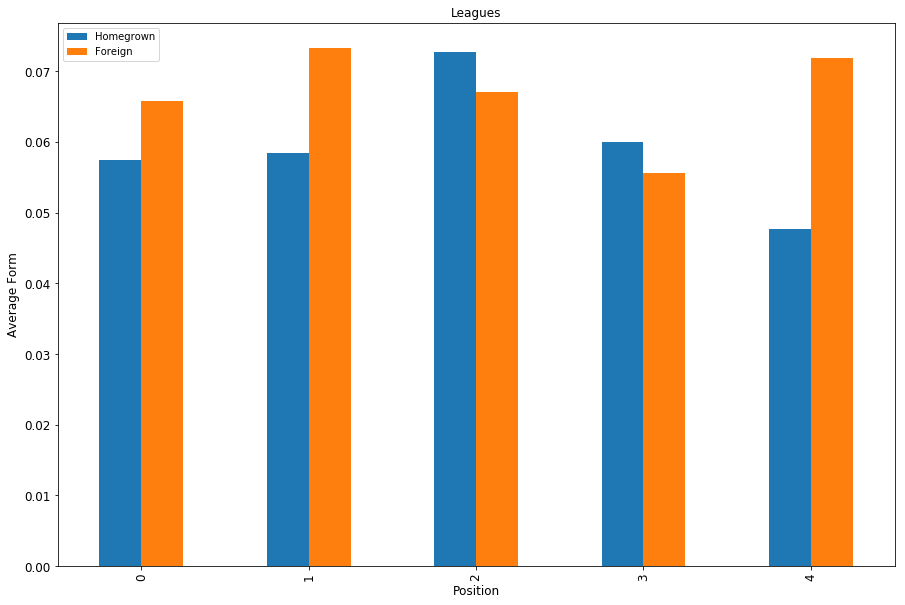

In [34]:
ax = assists[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

### Whos more likely to get a clean sheet (Goalkeepers)

In [35]:
EPLH_gkcleansheets = Homegrown_EPL.loc[Homegrown_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPLF_gkcleansheets = Foreign_EPL.loc[Foreign_EPL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
EPL_gkcleansheets = pd.DataFrame([EPLH_gkcleansheets,EPLF_gkcleansheets])

BUNH_gkcleansheets = Homegrown_BUN.loc[Homegrown_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUNF_gkcleansheets = Foreign_BUN.loc[Foreign_BUN['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
BUN_gkcleansheets = pd.DataFrame([BUNH_gkcleansheets,BUNF_gkcleansheets])

LALH_gkcleansheets = Homegrown_LAL.loc[Homegrown_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LALF_gkcleansheets = Foreign_LAL.loc[Foreign_LAL['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
LAL_gkcleansheets = pd.DataFrame([LALH_gkcleansheets,LALF_gkcleansheets])

L1H_gkcleansheets = Homegrown_L1.loc[Homegrown_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1F_gkcleansheets = Foreign_L1.loc[Foreign_L1['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
L1_gkcleansheets = pd.DataFrame([L1H_gkcleansheets,L1F_gkcleansheets])

SEIH_gkcleansheets = Homegrown_SEI.loc[Homegrown_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEIF_gkcleansheets = Foreign_SEI.loc[Foreign_SEI['Position']=='Goalkeeper','Clean Sheets/Apps'].mean()
SEI_gkcleansheets = pd.DataFrame([SEIH_gkcleansheets,SEIF_gkcleansheets])

gkcleansheets = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
gkcleansheets.set_value(0,'League',"EPL")
gkcleansheets.set_value(0,'Homegrown',EPLH_gkcleansheets)
gkcleansheets.set_value(0,'Foreign',EPLF_gkcleansheets)
gkcleansheets.set_value(1,'League',"LAL")
gkcleansheets.set_value(1,'Homegrown',LALH_gkcleansheets )
gkcleansheets.set_value(1,'Foreign',LALF_gkcleansheets)
gkcleansheets.set_value(2,'League',"BUN")
gkcleansheets.set_value(2,'Homegrown',BUNH_gkcleansheets)
gkcleansheets.set_value(2,'Foreign',BUNF_gkcleansheets)
gkcleansheets.set_value(3,'League',"L1")
gkcleansheets.set_value(3,'Homegrown',L1H_gkcleansheets)
gkcleansheets.set_value(3,'Foreign',L1F_gkcleansheets)
gkcleansheets.set_value(4,'League',"SEI")
gkcleansheets.set_value(4,'Homegrown',SEIH_gkcleansheets)
gkcleansheets.set_value(4,'Foreign',SEIF_gkcleansheets)

,League,Homegrown,Foreign
0,EPL,0.223278,0.283162
1,LAL,0.25863,0.286505
2,BUN,0.280529,0.334731
3,L1,0.271188,0.23206
4,SEI,0.245509,0.316857


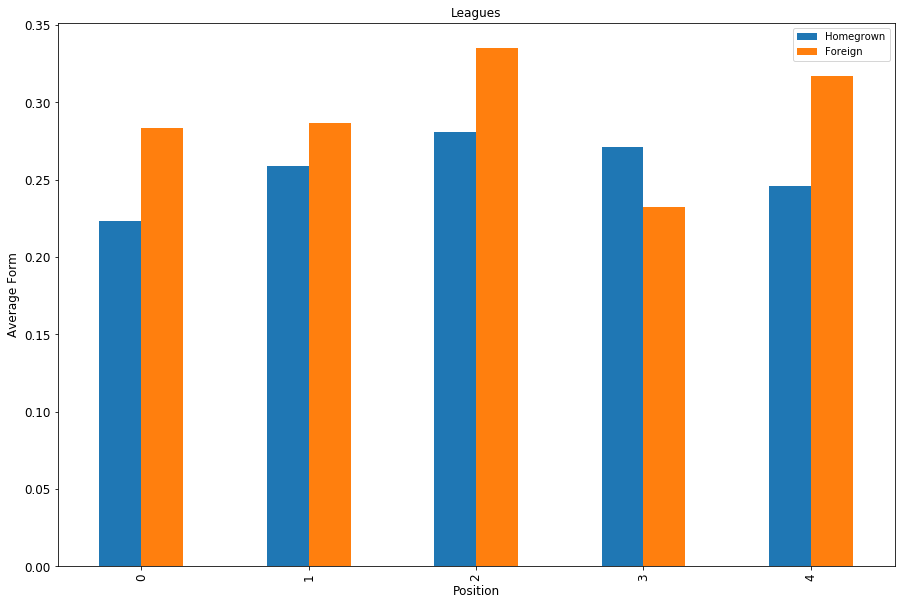

In [36]:
ax = gkcleansheets[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

## So who preforms the best vs Who is better rated?

In [37]:
EPLH_form = Homegrown_EPL['Average Form'].mean()
EPLF_form = Foreign_EPL['Average Form'].mean()
EPL_form = pd.DataFrame([EPLH_form,EPLF_form])

LALH_form = Homegrown_LAL['Average Form'].mean()
LALF_form = Foreign_LAL['Average Form'].mean()
LAL_form = pd.DataFrame([LALH_form,LALF_form])

BUNH_form = Homegrown_BUN['Average Form'].mean()
BUNF_form = Foreign_BUN['Average Form'].mean()
BUN_form = pd.DataFrame([BUNH_form,BUNF_form])

L1H_form = Homegrown_L1['Average Form'].mean()
L1F_form = Foreign_L1['Average Form'].mean()
L1_form = pd.DataFrame([L1H_form,L1F_form])

SEIH_form = Homegrown_SEI['Average Form'].mean()
SEIF_form = Foreign_SEI['Average Form'].mean()
SEI_form = pd.DataFrame([SEIH_form,SEIF_form])


form = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
form.set_value(0,'League',"EPL")
form.set_value(0,'Homegrown',EPLH_form)
form.set_value(0,'Foreign',EPLF_form)
form.set_value(1,'League',"LAL")
form.set_value(1,'Homegrown',LALH_form )
form.set_value(1,'Foreign',LALF_form)
form.set_value(2,'League',"BUN")
form.set_value(2,'Homegrown',BUNH_form)
form.set_value(2,'Foreign',BUNF_form)
form.set_value(3,'League',"L1")
form.set_value(3,'Homegrown',L1H_form)
form.set_value(3,'Foreign',L1F_form)
form.set_value(4,'League',"SEI")
form.set_value(4,'Homegrown',SEIH_form)
form.set_value(4,'Foreign',SEIF_form)

,League,Homegrown,Foreign
0,EPL,2.31152,2.5862
1,LAL,2.11461,2.56098
2,BUN,2.34053,2.40808
3,L1,2.26404,2.37418
4,SEI,2.16801,2.37202


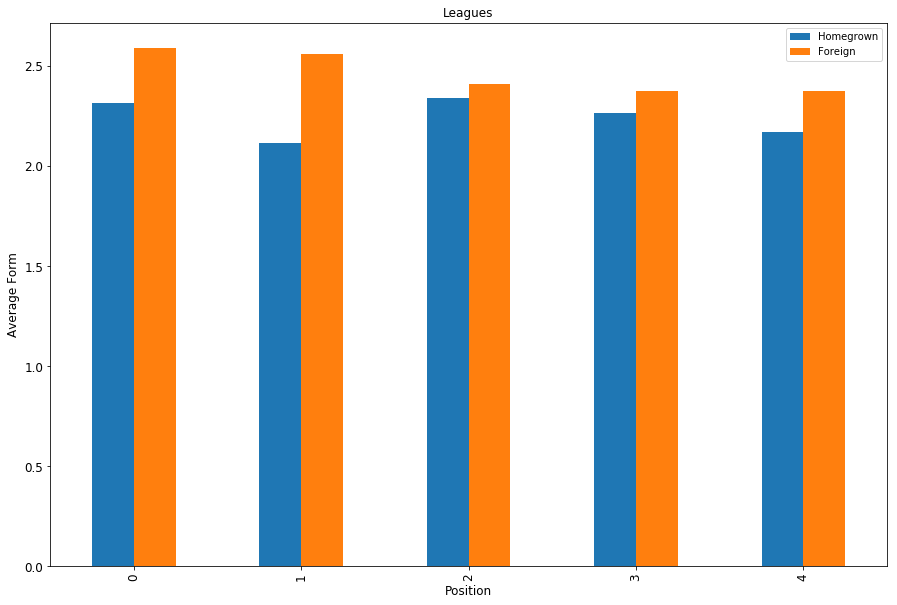

In [38]:
ax = form[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()

In [39]:
EPLH_overall = Homegrown_EPL['overall'].mean()
EPLF_overall = Foreign_EPL['overall'].mean()
EPL_overall = pd.DataFrame([EPLH_overall,EPLF_overall])

LALH_overall = Homegrown_LAL['overall'].mean()
LALF_overall = Foreign_LAL['overall'].mean()
LAL_overall = pd.DataFrame([LALH_overall,LALF_overall])

BUNH_overall = Homegrown_BUN['overall'].mean()
BUNF_overall = Foreign_BUN['overall'].mean()
BUN_overall = pd.DataFrame([BUNH_overall,BUNF_overall])

L1H_overall = Homegrown_L1['overall'].mean()
L1F_overall = Foreign_L1['overall'].mean()
L1_overall = pd.DataFrame([L1H_overall,L1F_overall])

SEIH_overall = Homegrown_SEI['overall'].mean()
SEIF_overall = Foreign_SEI['overall'].mean()
SEI_overall = pd.DataFrame([SEIH_overall,SEIF_overall])

overall = pd.DataFrame(columns = ["League","Homegrown", "Foreign"])
overall.set_value(0,'League',"EPL")
overall.set_value(0,'Homegrown',EPLH_overall)
overall.set_value(0,'Foreign',EPLF_overall)
overall.set_value(1,'League',"LAL")
overall.set_value(1,'Homegrown',LALH_overall )
overall.set_value(1,'Foreign',LALF_overall)
overall.set_value(2,'League',"BUN")
overall.set_value(2,'Homegrown',BUNH_overall)
overall.set_value(2,'Foreign',BUNF_overall)
overall.set_value(3,'League',"L1")
overall.set_value(3,'Homegrown',L1H_overall)
overall.set_value(3,'Foreign',L1F_overall)
overall.set_value(4,'League',"SEI")
overall.set_value(4,'Homegrown',SEIH_overall)
overall.set_value(4,'Foreign',SEIF_overall)

,League,Homegrown,Foreign
0,EPL,74.8794,78.1026
1,LAL,75.7582,78.5132
2,BUN,74.8111,76.2717
3,L1,73.0481,74.4115
4,SEI,74.094,76.6142


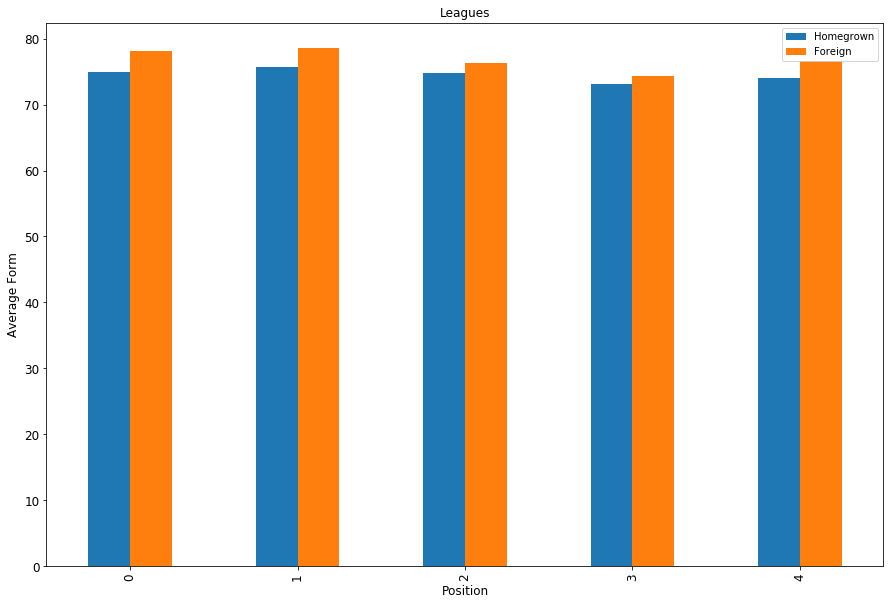

In [40]:
ax = overall[['Homegrown','Foreign']].plot(kind='bar', title ="Leagues", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Position", fontsize=12)
ax.set_ylabel("Average Form", fontsize=12)
plt.show()